# Analysis of recruiting data vs success outcomes

In [1]:
%matplotlib notebook

In [2]:
# import dependencies and read in needed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fbsRecruitingFrame = pd.read_csv("Data/fbsRecruitingData.csv")
fbsWinLossFrame = pd.read_csv("Data/fbsWinLossData.csv")
fbsWinLossFrame = fbsWinLossFrame[['season','team','games','wins','losses','ties']]

In [3]:
# combine data
comboFrame = pd.merge(fbsRecruitingFrame,fbsWinLossFrame, on= ['season','team'], how='outer')
comboFrame.head()

,season,team,id,mascot,abbreviation,conference,division,recruitingRank,recruitingPoints,games,wins,losses,ties
0,2004,Air Force,2005,Falcons,AFA,Mountain West,NaN,116.0,21.90,11,5,6,0
1,2004,Akron,2006,Zips,AKR,Mid-American,East,101.0,75.91,11,6,5,0
2,2004,Alabama,333,Crimson Tide,ALA,SEC,West,21.0,191.78,11,6,5,0
3,2004,Arizona,12,Wildcats,ARIZ,Pac-10,NaN,41.0,154.87,11,3,8,0
4,2004,Arizona State,9,Sun Devils,ASU,Pac-10,NaN,23.0,191.49,11,8,3,0


In [4]:
# create some percentage metrics to normalize data
comboFrame['winPct'] = comboFrame['wins']/comboFrame['games']
comboFrame.head()

,season,team,id,mascot,abbreviation,conference,division,recruitingRank,recruitingPoints,games,wins,losses,ties,winPct
0,2004,Air Force,2005,Falcons,AFA,Mountain West,NaN,116.0,21.90,11,5,6,0,0.454545
1,2004,Akron,2006,Zips,AKR,Mid-American,East,101.0,75.91,11,6,5,0,0.545455
2,2004,Alabama,333,Crimson Tide,ALA,SEC,West,21.0,191.78,11,6,5,0,0.545455
3,2004,Arizona,12,Wildcats,ARIZ,Pac-10,NaN,41.0,154.87,11,3,8,0,0.272727
4,2004,Arizona State,9,Sun Devils,ASU,Pac-10,NaN,23.0,191.49,11,8,3,0,0.727273


<IPython.core.display.Javascript object>


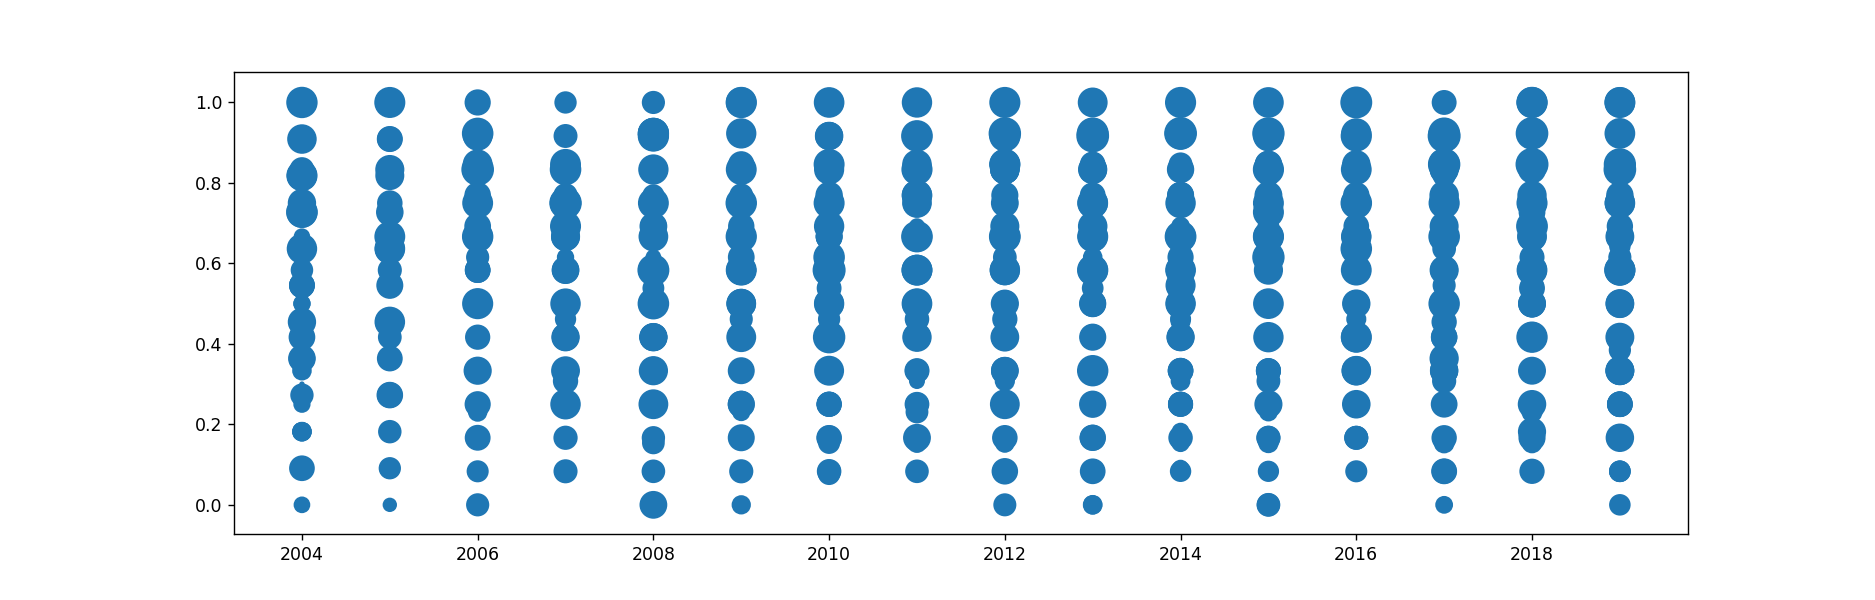

In [23]:
# create scatter/line plot of winPct over years using recruitingPoints as weight
xaxis = np.arange(len(comboFrame['season'].unique()))
fig,ax = plt.subplots()
ax.scatter(comboFrame['season'], comboFrame['winPct'], s=comboFrame['recruitingPoints'])
fig.set_figwidth(15)